# LAB: Identificando a los ingresos del cuartil superior

El objetivo de esta actividad es crear un modelo para predecir los casos en que el salario es mayor o menor a 50K.
El dataset está construido sobre la base de datos del Censo del año 1994 de los Estados Unidos.

**Nota:** más información en [Adult UCI Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

## 1. Exploración de los datos

Los datos están contenidos en el archivo de la Base de Datos: `adult.sqlite`

**Comenzar cargando los datos en Pandas DataFrames.**

In [1]:
import sqlite3

sqlite_db = 'adult.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()

**Leer la estructura de la tabla Adult y obtener los nombres de los campos**

In [2]:
cols = c.execute("PRAGMA table_info('adult')").fetchall()
adult_cols = [x[1] for x in cols]

** Transformar los datos en un dataframe de pandas**

In [3]:
import pandas as pd
df = pd.DataFrame(c.execute("SELECT * from adult").fetchall(), columns = adult_cols)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 1.1 Identificación de Valores faltantes

¿Faltan algunos valores?
¿Qué se puede hacer para solucionarlo?

Discutir diferentes estrategias con un compañero y decidir cuál se va a utilizar (por ejemplo, completarlos con determinado valor, eliminarlos, etc.)

In [5]:
## Ver información de la tabla, acerca de cuántos valores tiene cada columna (y por lo tanto cuántos faltan o son nulos)
# df.info()
## Se eliminan las filas que contengan algún atributo nulo, en caso de optar por esta estrategia.
# df = df.dropna()
## Luego volver a ver la Info para verificar la cantidad de registros resultantes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
salary            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## 2. Análisis de la variable objetivo (`salary`)

El salario está separado en 2 clases: '<=50K' y '>50K'.

Crear una variable 'target', de tipo boolean, que valga True cuando el salario sea >50K y False en caso contrario.

In [7]:
df['target'] = pd.get_dummies(df['salary'],drop_first=True)

#Otra forma de hacerlo con la función map
#df['target'] = df['salary'].map(lambda x: 1 if x == ">50K" else 0)

In [8]:
df[['target']] = df[['target']].astype(int)

In [9]:
df.target.value_counts()

0    37155
1    11687
Name: target, dtype: int64

## 3. Características

El dataset contiene varias características o variables.

- ¿Contiene características numéricas?
- ¿Contiene características categóricas?

> Hay de ambas características o variables

### 3.a Distribución de la edad

¿Cuál es la distribución de la edad? ¿Cómo se relacionan la edad con la nueva variable 'target'?

- Graficar un histograma de la columna 'age'.
- Separar por 'target' y graficar la distribución de la edad para las 2 clases.

In [10]:
df[['age','target']].corr()

,age,target
age,1.000000,0.230369
target,0.230369,1.000000


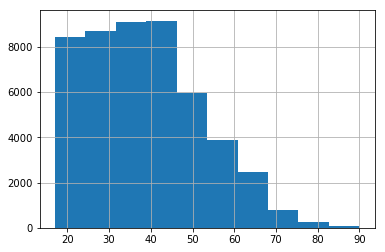

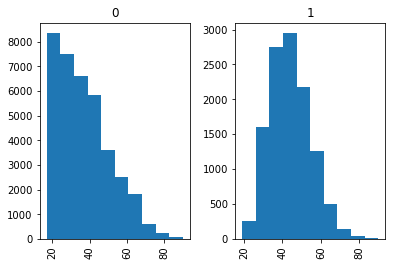

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

df.age.hist()
plt.show()
df.age.hist(by=df.target)
plt.show()

La única conclusión que se puede obtener a simple vista es que hay mucha más gente joven en la clase de ingresos más bajos (clase 0).

### 3.b Distribución de características categóricas

Investigar la relación de cada característica categórica con la clase de salario:

- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex

Utilizar un gráfico de barras para mostrar la frecuencia relativa de cada uno de los elementos en el grupo.
Distinguir mediante dos colores las clases de salario bajo y alto.

¿Qué características presentan una diferencia significativa en los ratios?

In [12]:
for i in df.columns:
    print(df[i].value_counts())

36    1348
35    1337
33    1335
23    1329
31    1325
34    1303
37    1280
28    1280
30    1278
38    1264
32    1253
41    1235
27    1232
29    1223
39    1206
24    1206
25    1195
40    1187
22    1178
42    1165
26    1153
20    1113
43    1104
46    1097
21    1096
45    1096
47    1081
44    1067
19    1053
51     877
      ... 
60     449
62     394
64     340
63     335
65     284
67     238
66     237
68     178
69     149
70     133
72     120
71     118
73     108
74      77
75      72
76      69
90      55
77      54
80      38
81      37
78      34
79      30
82      15
84      13
83      11
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
203488    21
120277    19
190290    19
125892    18
126

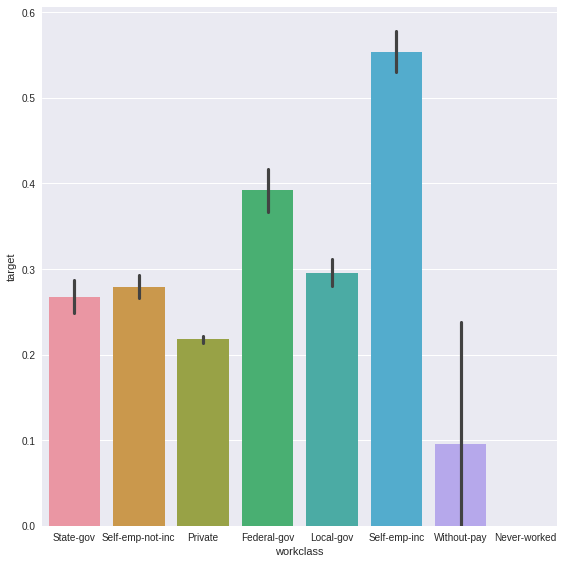

In [13]:
import seaborn as sns
sns.factorplot(x="workclass", y = 'target', data=df, kind="bar", size=8)

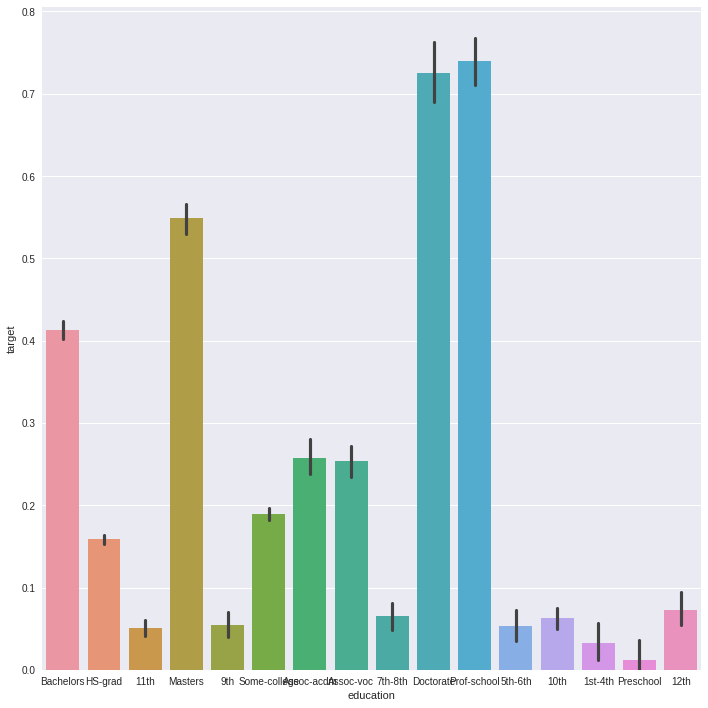

In [14]:
sns.factorplot(x="education", y = 'target', data=df, kind="bar", size=10)

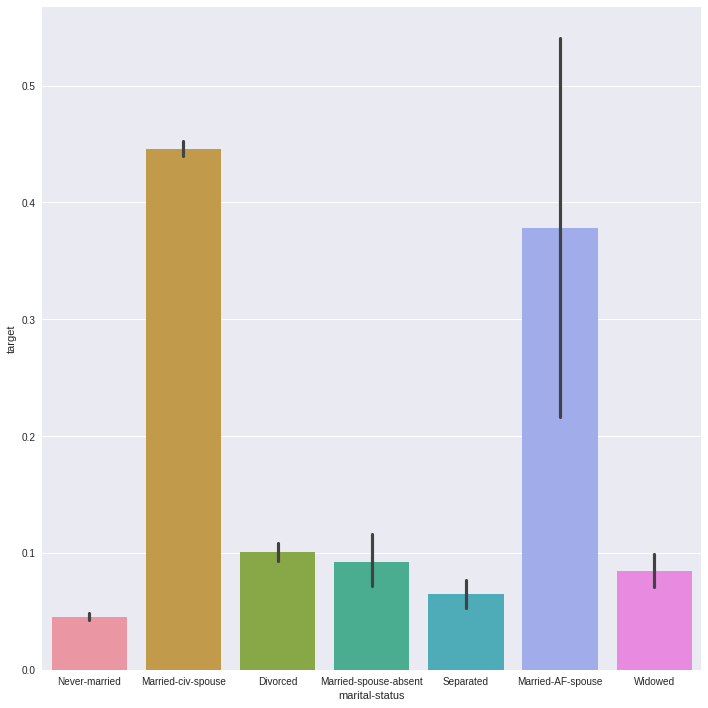

In [15]:
sns.factorplot(x="marital-status", y = 'target', data=df, kind="bar", size=10)

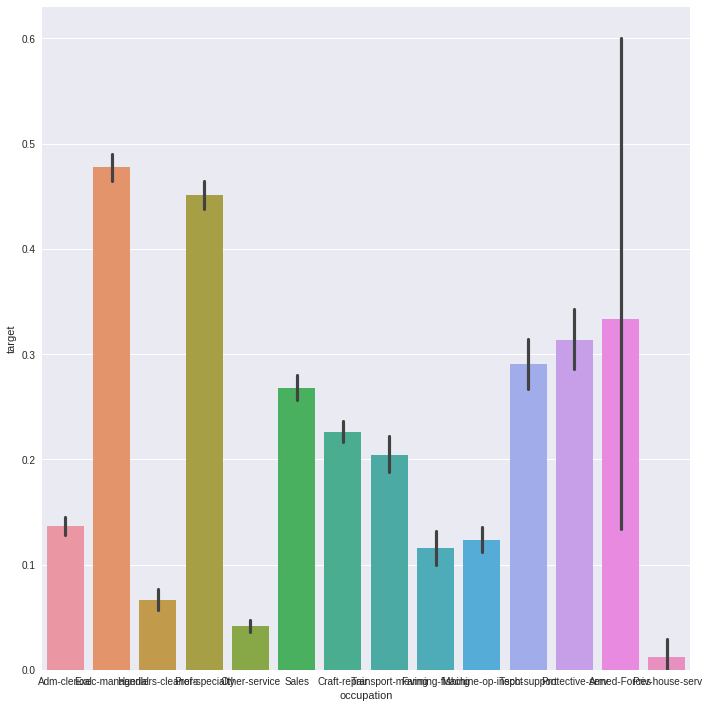

In [16]:
sns.factorplot(x="occupation", y = 'target', data=df, kind="bar", size=10)

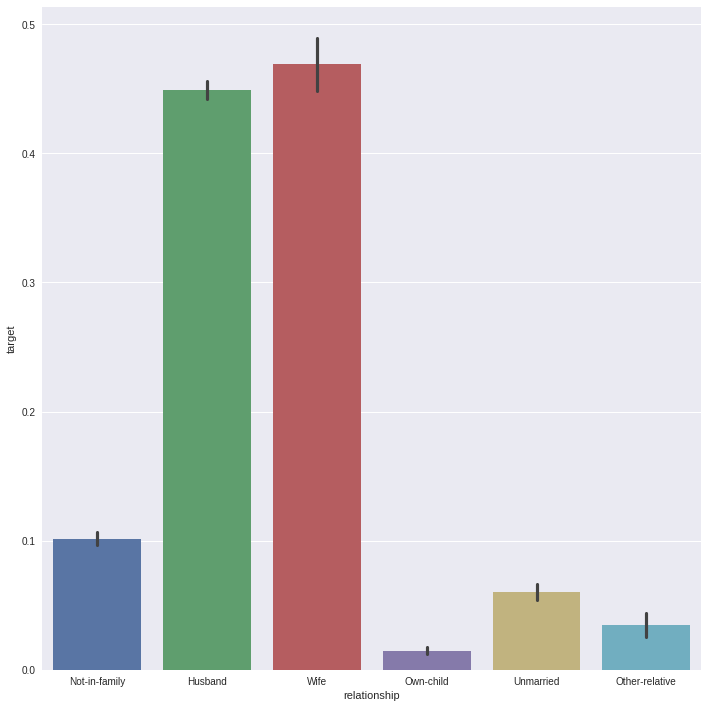

In [17]:
sns.factorplot(x="relationship", y = 'target', data=df, kind="bar", size=10)

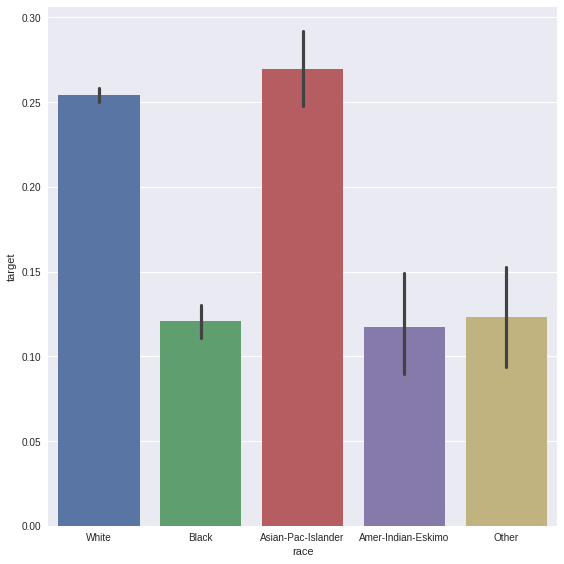

In [18]:
sns.factorplot(x="race", y = 'target', data=df, kind="bar", size=8)

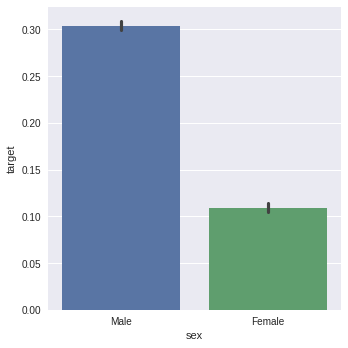

In [19]:
sns.factorplot(x="sex", y = 'target', data=df, kind="bar", size=5)

### 3.c Distribución de otras características numéricas

Al igual que se hizo con la edad, investingar la distribución de otras características numéricas para las 2 clases.

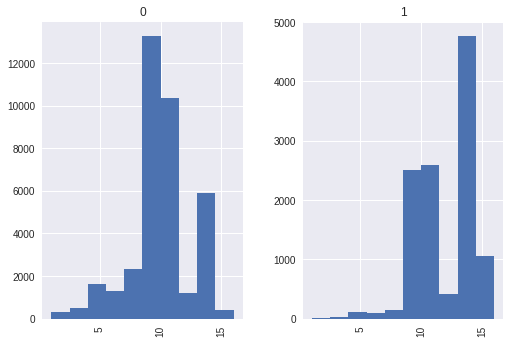

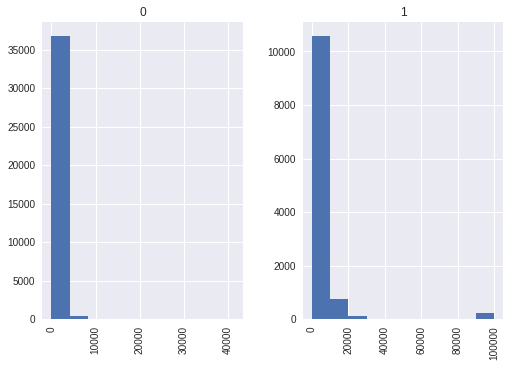

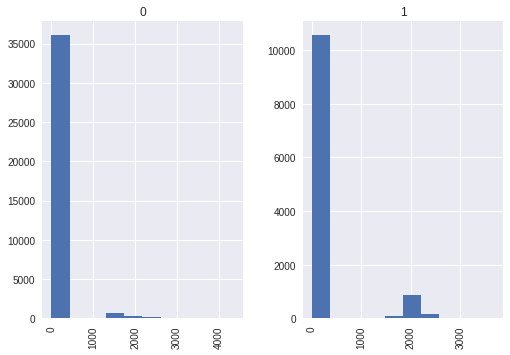

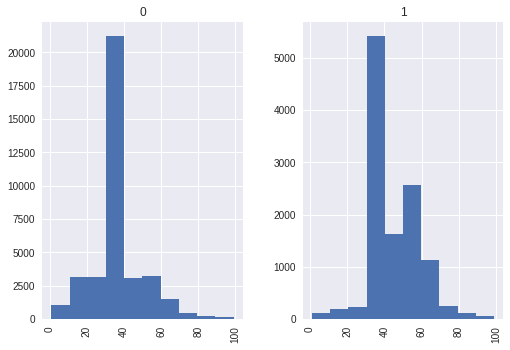

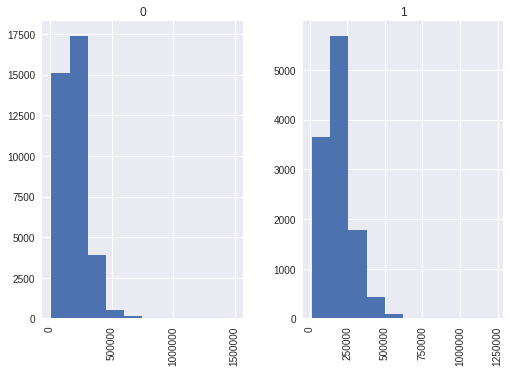

In [20]:
df["education-num"].hist(by=df.target)
plt.show()
df["capital-gain"].hist(by=df.target)
plt.show()
df["capital-loss"].hist(by=df.target)
plt.show()
df["hours-per-week"].hist(by=df.target)
plt.show()
df["fnlwgt"].hist(by=df.target)
plt.show()

## 4. Columnas 'Dummy'

Los modelos Scikit-Learn requiere características con valores numéricos. Para poder utilizar todas las características categóricas del modelo de datos es necesario codificarlas como números. La manera de hacerlo se llama 'One-Hot Encoding' o Creación de Columnas 'Dummy'.
Tanto Pandas como Scikit Learn ofrecen una interfaz para realizar esto. Elegir la de mayor preferencia.

Ejemplo:

|Característica categórica|Dummy_A|Dummy_B|Dummy_C|
|---|---|---|---|
|A|1|0|0|
|B|0|1|0|
|B|0|1|0|
|C|0|0|1|
|A|1|0|0|
|C|0|0|1|
|B|0|1|0|

- [One Hot Encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Get Dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)


In [21]:
dummies = pd.get_dummies(df[['workclass','education','marital-status','occupation','relationship','race','sex']])

# data = pd.concat([data, area_dummies], axis=1)
# data.head()

In [22]:
dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


## 5. Normalización de variables numéricas

Las variables o features numéricas pueden tener diferentes escalas lo cual, en algunos casos, puede ocasionar problemas. Por lo tanto se recomienda intentar normalizarlas utilizando funciones para ajustar las escalas.

Utilizar las funciones provistas Scikit-learn Preprocessing para cambiar la escala de las características numéricas.

[Scikit-Learn Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html)

Discutir con un compañero acerca de las ventajas y desventajas de cada una de las funciones.

In [23]:
ndf = df[['age','education-num','capital-gain','capital-loss','hours-per-week','target']]

In [24]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
ndf_minmax = scaler.fit_transform(ndf)

In [25]:
ndf_minmax

array([[ 0.30136986,  0.8       ,  0.02174022,  0.        ,  0.39795918,
         0.        ],
       [ 0.45205479,  0.8       ,  0.        ,  0.        ,  0.12244898,
         0.        ],
       [ 0.28767123,  0.53333333,  0.        ,  0.        ,  0.39795918,
         0.        ],
       ..., 
       [ 0.28767123,  0.8       ,  0.        ,  0.        ,  0.5       ,
         0.        ],
       [ 0.36986301,  0.8       ,  0.05455055,  0.        ,  0.39795918,
         0.        ],
       [ 0.24657534,  0.8       ,  0.        ,  0.        ,  0.60204082,
         1.        ]])

## 6. Combinar features

Combinar las features codificadas con columnas 'dummy' con aquellas a las que se le ajustaron la escala en un mismo dataset llamado `X`.

Renombrar la variable 'target' como `y`.

¿Cuál es el puntaje de precisión de un modelo de benchmark? ¿Cuál es el modelo más simple que se puede construir?

In [26]:
ndf_minmax_df = pd.DataFrame(ndf_minmax, columns = ['age','education-num','capital-gain','capital-loss','hours-per-week','target'])

data = pd.concat([ndf_minmax_df, dummies], axis=1)

In [27]:
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0.301370,0.800000,0.02174,0.0,0.397959,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.452055,0.800000,0.00000,0.0,0.122449,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.287671,0.533333,0.00000,0.0,0.397959,0.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0.493151,0.400000,0.00000,0.0,0.397959,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0.150685,0.800000,0.00000,0.0,0.397959,0.0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


## 7. Construir y evaluar un modelo

Construir tres clasificadores: 

1. Logistic Regression (sin regularización)
2. Logistic Regression (con regularización y tunning de hiperaparámetros)
3. KNN, SVC o Naïve Bayes (según lo "sorteado") 

Previamente, dividir los datos en subconjuntos de entrenamiento y prueba utilizando la siguiente linea:

    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
1. Evaluar el `accuracy_score` del modelo construido.
2. Mostrar la matriz de confusión y el reporte de clasificación.
3. Intentar mejorar el modelo ajustando los parámetros. Por ejemplo:
    - LogisticRegression: cambiar la fuerza de la regularización
    - KNN: modificar el númnero de `neighbors`
    - SVC: modificar los parámetros `gamma` o `C` 
    - Naïve Bayes: cambiar los priors del modelo
4. Discutir y comparar con un compañero el mejor modelo obtenido por cada uno.
5. Discutir las interpretaciones posibles de cada uno de los modelos



### 7.1 Regresión Logística (base - sin regularización)

Estime un clasificador basado en un modelo de regresión logística para la variable `target`. Testee diferentes valores de C -equivalente a alpha en regresión lineal- para las dos penalidades posibles de una regresión logística. 

1. ¿Qué tipo de regularización funciona mejor?
2. ¿Cuáles son los parámetros óptimos?
3. ¿Qué puede decir con respecto a la matriz de confusión del clasificador estimado?
4. ¿Cuáles son las variables más relevantes?
5. ¿Cómo interpretaría los coeficientes obtenidos?

In [28]:
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

In [29]:
data = data.dropna()
X = data.drop("target",axis=1)
y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
logreg_cv = LogisticRegressionCV()
logreg_cv.fit(X_train, y_train)
logreg_cv.score(X_test,y_test)
y_pred = logreg_cv.predict(X_test)

In [32]:
print(logreg_cv.score(X_test,y_test))
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(logreg_cv, X_test, y_test, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

0.849236878025
mean accuracy: 0.8492366689906886, all: [ 0.84794342  0.85389913  0.84586746]
mean precision: 0.7310046526852306, all: [ 0.73018868  0.74163569  0.72118959]
mean recall: 0.5998965752297676, all: [ 0.59310345  0.61149425  0.59509202]
mean roc_auc: 0.9024091782457316, all: [ 0.90044879  0.90594228  0.90083647]


In [33]:
print(confusion_matrix(y_test, y_pred))

[[11403   801]
 [ 1629  2285]]


### 7.3 Regresión Logística (con regularización)

In [34]:
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression()

In [35]:
C_vals = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 11, 12, 13, 14, 15, 100.0, 1000.0]
penalties = ['l1','l2']
gs = GridSearchCV(logreg, {'penalty':penalties, 'C':C_vals}, verbose=True, cv=5, scoring='accuracy', n_jobs = 3)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=3)]: Done  63 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done 170 out of 170 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=3,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1.0, 2.5, 5.0, 10.0, 11, 12, 13, 14, 15, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [36]:
gs.best_params_

{'C': 12, 'penalty': 'l2'}

In [37]:
logreg = LogisticRegression(C=0.5, penalty='l1')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(logreg, X_test, y_test, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

mean accuracy: 0.8491746073056697, all: [ 0.84850177  0.85352689  0.84549516]
mean precision: 0.7345764605059172, all: [ 0.73403241  0.74526515  0.72443182]
mean recall: 0.5932532966645511, all: [ 0.59003831  0.60306513  0.58665644]
mean roc_auc: 0.9030045631410942, all: [ 0.90138027  0.90600274  0.90163068]


In [39]:
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[11407   797]
 [ 1628  2286]]


In [40]:
print(classification_report(y_test, y_pred)), "\n"

             precision    recall  f1-score   support

        0.0       0.88      0.93      0.90     12204
        1.0       0.74      0.58      0.65      3914

avg / total       0.84      0.85      0.84     16118



(None, '\n')

### 7.4 Modelos KNN con diferente k

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [42]:
knnei_scores = {}
knnei_scores.fromkeys([3, 5, 8])
for k in [3, 5, 8]:
    knn = KNeighborsClassifier(n_neighbors=k,
                           weights='uniform',
                           p=2,
                           metric='minkowski')
    knn.fit(X_train, y_train)
    score = knn.score(X_test,y_test)
    knnei_scores[k] = score

In [43]:
knnei_scores

{3: 0.81238367043057447, 5: 0.820387144807048, 8: 0.8274599826281176}

### 7.5 Naïve Bayes

### 7.6 Support Vector Machines